In [333]:
import math
import collections
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json

%matplotlib inline


from nba_api.stats.endpoints import playercareerstats

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

import pickle
import seaborn as sns
   

In [334]:
with open('mainScoringDF.pkl', 'rb') as f:
    mainDF = pickle.load(f) # deserialize using load()

In [335]:
mainDF


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980-81,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980-81,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980-81,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980-81,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980-81,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022-23,00,1610612755,PHI,29.0,66,66.0,2284.0,...,0.857,113.0,557.0,670,274,66.0,112.0,226.0,205,2183
5,Jayson Tatum,1628369,2022-23,00,1610612738,BOS,25.0,74,74.0,2732.0,...,0.854,78.0,571.0,649,342,78.0,51.0,213.0,160,2225
9,Giannis Antetokounmpo,203507,2022-23,00,1610612749,MIL,28.0,63,63.0,2024.0,...,0.645,137.0,605.0,742,359,52.0,51.0,246.0,197,1959
7,Devin Booker,1626164,2022-23,00,1610612756,PHX,26.0,53,53.0,1835.0,...,0.855,46.0,194.0,240,293,51.0,18.0,145.0,159,1471


<Axes: >

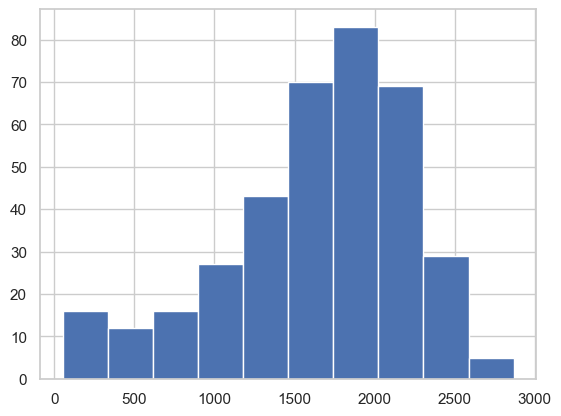

In [336]:
mainDF['PTS'].hist()

In [337]:
#sns.histplot(data=mainDF, x = 'GP' > 20,y='PTS')


In [338]:
#faresClean = titanic_clean.loc[titanic_clean['Fare'] < 400]
mainDFCLEAN =mainDF.loc[mainDF['GP'] > 40]

<Axes: xlabel='GP', ylabel='PTS'>

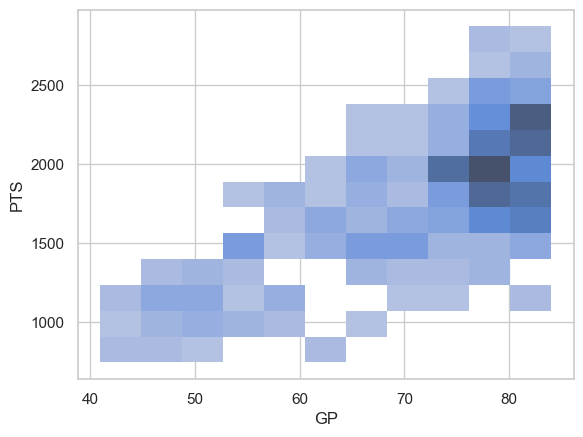

In [339]:
sns.histplot(data=mainDFCLEAN, x = 'GP',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

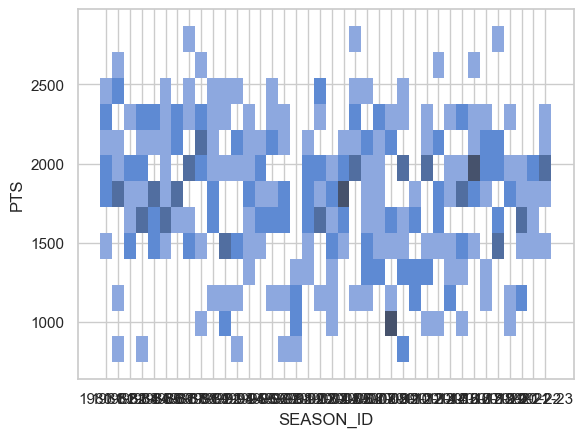

In [340]:
sns.histplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

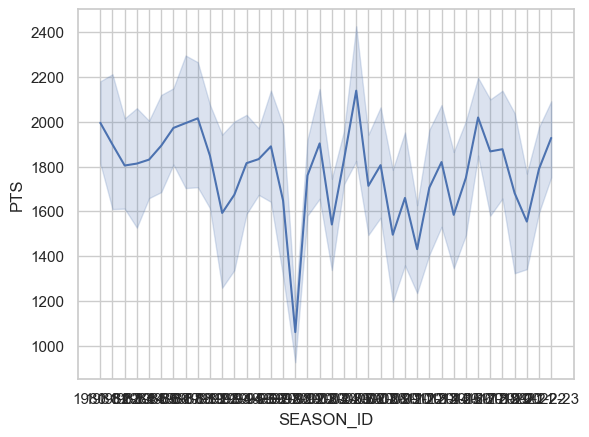

In [341]:
sns.lineplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


In [342]:
# clears lockout sesaon

mainDFCLEANnolockout =mainDF.loc[mainDF['PTS'] > 1200]


In [343]:
#with open('mainDFCLEANnolockout.pkl','wb') as f: #opens file
#    pickle.dump(mainDFCLEANnolockout,f)
#with open('mainDFCLEAN.pkl','wb') as f: #opens file
#    pickle.dump(mainDFCLEAN,f)

<Axes: >

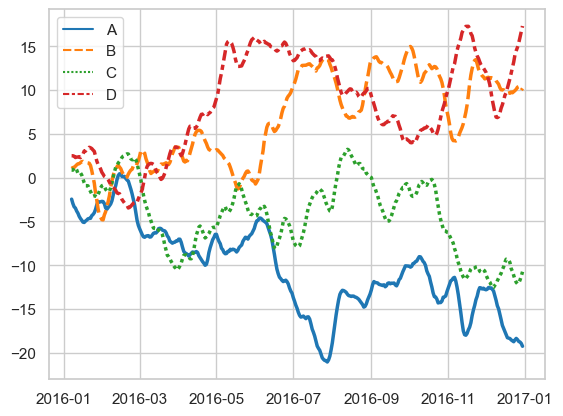

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [345]:
mainDF.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [346]:
data = mainDFCLEANnolockout[["SEASON_ID", "PTS", "AST", "REB"]]


In [347]:
data

,SEASON_ID,PTS,AST,REB
4,1980-81,2221,260,419
6,1980-81,2222,141,1180
4,1980-81,2014,364,657
11,1980-81,2095,272,821
4,1980-81,1749,158,676
...,...,...,...,...
6,2022-23,2183,274,670
5,2022-23,2225,342,649
9,2022-23,1959,359,742
7,2022-23,1471,293,240


<Axes: >

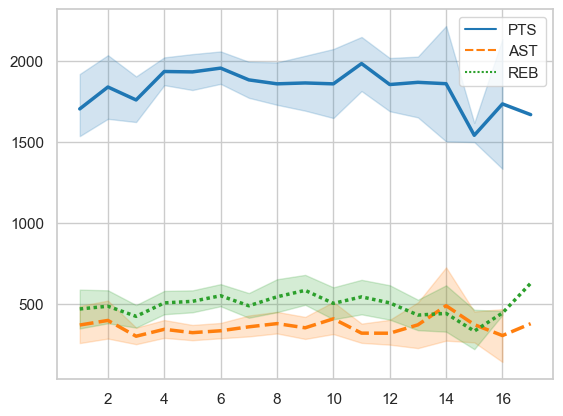

In [348]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

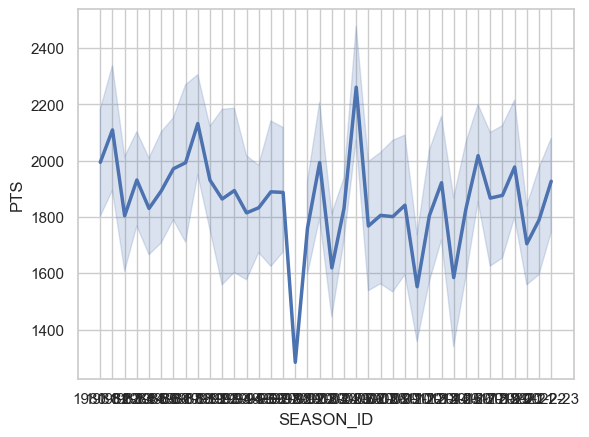

In [349]:
sns.lineplot(data=data,linewidth=2.5, x='SEASON_ID',y='PTS')


In [350]:
mainDF.dtypes

Player_Name           object
PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                   float64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                    int64
AST                    int64
STL                  float64
BLK                  float64
TOV                  float64
PF                     int64
PTS                    int64
dtype: object

In [351]:
mainDF['SEASON_ID'][0:4]
mainDF1=mainDF

In [352]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('str')


In [353]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('str')


In [354]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1980-81','1980')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1981-82','1981')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1982-83','1982')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1983-84','1983')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1984-85','1984')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1985-86','1985')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1986-87','1986')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1987-88','1987')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1988-89','1988')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1989-90','1989')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022-23,00,1610612755,PHI,29.0,66,66.0,2284.0,...,0.857,113.0,557.0,670,274,66.0,112.0,226.0,205,2183
5,Jayson Tatum,1628369,2022-23,00,1610612738,BOS,25.0,74,74.0,2732.0,...,0.854,78.0,571.0,649,342,78.0,51.0,213.0,160,2225
9,Giannis Antetokounmpo,203507,2022-23,00,1610612749,MIL,28.0,63,63.0,2024.0,...,0.645,137.0,605.0,742,359,52.0,51.0,246.0,197,1959
7,Devin Booker,1626164,2022-23,00,1610612756,PHX,26.0,53,53.0,1835.0,...,0.855,46.0,194.0,240,293,51.0,18.0,145.0,159,1471


In [355]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1990-91','1990')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1991-92','1991')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1992-93','1992')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1993-94','1993')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1994-95','1994')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1995-96','1995')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1996-97','1996')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1997-98','1997')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1998-99','1998')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1999-00','1999')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022-23,00,1610612755,PHI,29.0,66,66.0,2284.0,...,0.857,113.0,557.0,670,274,66.0,112.0,226.0,205,2183
5,Jayson Tatum,1628369,2022-23,00,1610612738,BOS,25.0,74,74.0,2732.0,...,0.854,78.0,571.0,649,342,78.0,51.0,213.0,160,2225
9,Giannis Antetokounmpo,203507,2022-23,00,1610612749,MIL,28.0,63,63.0,2024.0,...,0.645,137.0,605.0,742,359,52.0,51.0,246.0,197,1959
7,Devin Booker,1626164,2022-23,00,1610612756,PHX,26.0,53,53.0,1835.0,...,0.855,46.0,194.0,240,293,51.0,18.0,145.0,159,1471


In [356]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2000-01','2000')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2001-02','2001')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2002-03','2002')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2003-04','2003')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2004-05','2004')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2005-06','2005')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2006-07','2006')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2007-08','2007')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2008-09','2008')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2009-10','2009')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022-23,00,1610612755,PHI,29.0,66,66.0,2284.0,...,0.857,113.0,557.0,670,274,66.0,112.0,226.0,205,2183
5,Jayson Tatum,1628369,2022-23,00,1610612738,BOS,25.0,74,74.0,2732.0,...,0.854,78.0,571.0,649,342,78.0,51.0,213.0,160,2225
9,Giannis Antetokounmpo,203507,2022-23,00,1610612749,MIL,28.0,63,63.0,2024.0,...,0.645,137.0,605.0,742,359,52.0,51.0,246.0,197,1959
7,Devin Booker,1626164,2022-23,00,1610612756,PHX,26.0,53,53.0,1835.0,...,0.855,46.0,194.0,240,293,51.0,18.0,145.0,159,1471


In [357]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2010-11','2010')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2011-12','2011')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2012-13','2012')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2013-14','2013')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2014-15','2014')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2015-16','2015')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2016-17','2016')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2017-18','2017')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2018-19','2018')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2019-20','2019')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2020-21','2020')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2021-22','2021')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2022-23','2022')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,0.857,113.0,557.0,670,274,66.0,112.0,226.0,205,2183
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,0.854,78.0,571.0,649,342,78.0,51.0,213.0,160,2225
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,0.645,137.0,605.0,742,359,52.0,51.0,246.0,197,1959
7,Devin Booker,1626164,2022,00,1610612756,PHX,26.0,53,53.0,1835.0,...,0.855,46.0,194.0,240,293,51.0,18.0,145.0,159,1471


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

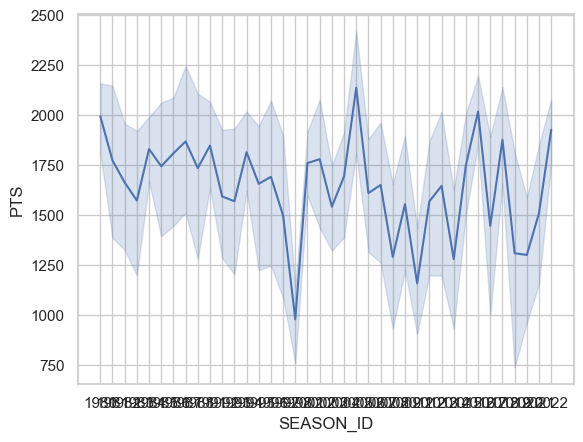

In [358]:
sns.lineplot(data=mainDF1, x = 'SEASON_ID',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

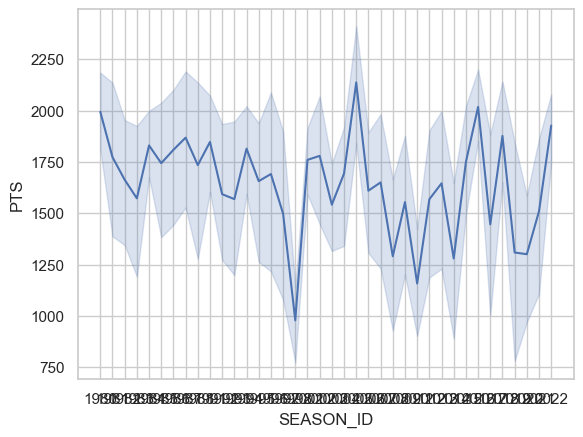

In [359]:
mainDF2=mainDF3.set_index(['SEASON_ID'])
sns.lineplot(data=mainDF1, x = 'SEASON_ID',y='PTS')


In [360]:
mainDF1.dtypes

Player_Name           object
PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                   float64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                    int64
AST                    int64
STL                  float64
BLK                  float64
TOV                  float64
PF                     int64
PTS                    int64
dtype: object

In [361]:
# create a list of our conditions
conditions = [(mainDF1['PLAYER_AGE']>=30),
              (mainDF1['PLAYER_AGE']<=29)]

# create a list of the values we want to assign for each condition
values = ['Over 30', 'Under 30']

# create a new column and use np.select to assign values to it using our lists as arguments
mainDF1['Age_Group'] = np.select(conditions, values)

# display updated DataFrame
mainDF1.head()


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,126.0,293.0,419,260,94.0,56.0,251.0,212,2221,Under 30
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222,Under 30
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,244.0,413.0,657,364,173.0,147.0,266.0,233,2014,Over 30
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,197.0,624.0,821,272,59.0,228.0,249.0,244,2095,Over 30
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,229.0,447.0,676,158,83.0,53.0,130.0,249,1749,Over 30


In [362]:
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,126.0,293.0,419,260,94.0,56.0,251.0,212,2221,Under 30
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222,Under 30
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,244.0,413.0,657,364,173.0,147.0,266.0,233,2014,Over 30
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,197.0,624.0,821,272,59.0,228.0,249.0,244,2095,Over 30
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,229.0,447.0,676,158,83.0,53.0,130.0,249,1749,Over 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,113.0,557.0,670,274,66.0,112.0,226.0,205,2183,Under 30
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,78.0,571.0,649,342,78.0,51.0,213.0,160,2225,Under 30
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,137.0,605.0,742,359,52.0,51.0,246.0,197,1959,Under 30
7,Devin Booker,1626164,2022,00,1610612756,PHX,26.0,53,53.0,1835.0,...,46.0,194.0,240,293,51.0,18.0,145.0,159,1471,Under 30


In [363]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('int64')

In [364]:
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,126.0,293.0,419,260,94.0,56.0,251.0,212,2221,Under 30
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222,Under 30
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,244.0,413.0,657,364,173.0,147.0,266.0,233,2014,Over 30
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,197.0,624.0,821,272,59.0,228.0,249.0,244,2095,Over 30
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,229.0,447.0,676,158,83.0,53.0,130.0,249,1749,Over 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,113.0,557.0,670,274,66.0,112.0,226.0,205,2183,Under 30
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,78.0,571.0,649,342,78.0,51.0,213.0,160,2225,Under 30
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,137.0,605.0,742,359,52.0,51.0,246.0,197,1959,Under 30
7,Devin Booker,1626164,2022,00,1610612756,PHX,26.0,53,53.0,1835.0,...,46.0,194.0,240,293,51.0,18.0,145.0,159,1471,Under 30


In [365]:
# create a list of our conditions
conditions = [(mainDF1['SEASON_ID'] < 1990),
              (mainDF1['SEASON_ID'] >= 1990) & (mainDF1['SEASON_ID'] <= 1999),
              (mainDF1['SEASON_ID'] >= 2000) & (mainDF1['SEASON_ID'] <= 2009),
              (mainDF1['SEASON_ID'] >= 2010)]

# create a list of the values we want to assign for each condition
values = ['80s', '90s', '00s', '10s']

# create a new column and use np.select to assign values to it using our lists as arguments
mainDF1['Decade'] = np.select(conditions, values)

# display updated DataFrame
mainDF1.head()


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,293.0,419,260,94.0,56.0,251.0,212,2221,Under 30,80s
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,706.0,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,413.0,657,364,173.0,147.0,266.0,233,2014,Over 30,80s
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,624.0,821,272,59.0,228.0,249.0,244,2095,Over 30,80s
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,447.0,676,158,83.0,53.0,130.0,249,1749,Over 30,80s


In [366]:

#with open('mainDfDecades.pkl','wb') as f: #opens file
#    pickle.dump(mainDF1,f)

<Axes: xlabel='Decade', ylabel='PTS'>

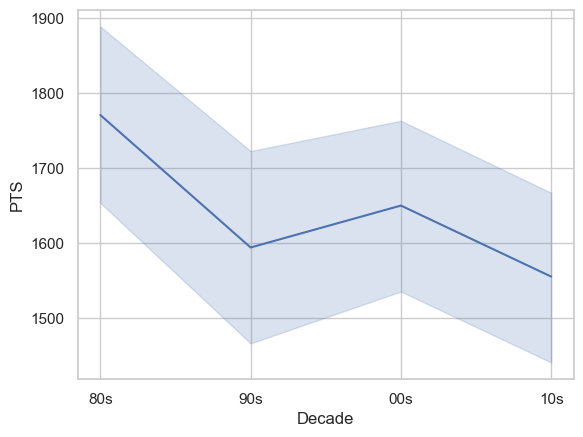

In [367]:

sns.lineplot(data=mainDF1, x = 'Decade',y='PTS')


In [368]:
# create a list of our conditions
conditions = [(mainDF1['SEASON_ID'] >= 1980) & (mainDF1['SEASON_ID'] <= 1985),
              (mainDF1['SEASON_ID'] >= 1986) & (mainDF1['SEASON_ID'] <= 1990),
              (mainDF1['SEASON_ID'] >= 1990) & (mainDF1['SEASON_ID'] <= 1995),
              (mainDF1['SEASON_ID'] >= 1996) & (mainDF1['SEASON_ID'] <= 2000),
              (mainDF1['SEASON_ID'] >= 2001) & (mainDF1['SEASON_ID'] <= 2005),
              (mainDF1['SEASON_ID'] >= 2006) & (mainDF1['SEASON_ID'] <= 2010),
              (mainDF1['SEASON_ID'] >= 2011) & (mainDF1['SEASON_ID'] <= 2015),
              (mainDF1['SEASON_ID'] >= 2016)]

# create a list of the values we want to assign for each condition
values = ['80-85','86-90','91-95','96-00','01-05','06-10','11-15','16-21']

# create a new column and use np.select to assign values to it using our lists as arguments
mainDF1['YearGroupsFives'] = np.select(conditions, values)

# display updated DataFrame
mainDF1.head()


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade,YearGroupsFives
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,419,260,94.0,56.0,251.0,212,2221,Under 30,80s,80-85
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s,80-85
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,657,364,173.0,147.0,266.0,233,2014,Over 30,80s,80-85
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,821,272,59.0,228.0,249.0,244,2095,Over 30,80s,80-85
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,676,158,83.0,53.0,130.0,249,1749,Over 30,80s,80-85


In [369]:
#with open('mainDFBest1.pkl','wb') as f: #opens file
#    pickle.dump(mainDF1,f)

<Axes: xlabel='YearGroupsFives', ylabel='PTS'>

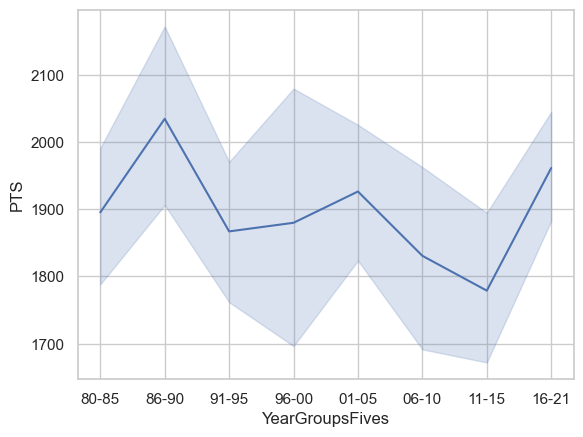

In [370]:
sns.lineplot(data=mainDF3, x = 'YearGroupsFives',y='PTS')


In [371]:
#or
with open('scoringAllByYearClean.pkl', 'rb') as f:
    poop = pickle.load(f) # deserialize using load()

In [372]:
mainDF1.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Age_Group',
       'Decade', 'YearGroupsFives'],
      dtype='object')

In [373]:
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade,YearGroupsFives
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,419,260,94.0,56.0,251.0,212,2221,Under 30,80s,80-85
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s,80-85
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,657,364,173.0,147.0,266.0,233,2014,Over 30,80s,80-85
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,821,272,59.0,228.0,249.0,244,2095,Over 30,80s,80-85
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,676,158,83.0,53.0,130.0,249,1749,Over 30,80s,80-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,670,274,66.0,112.0,226.0,205,2183,Under 30,10s,16-21
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,649,342,78.0,51.0,213.0,160,2225,Under 30,10s,16-21
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,742,359,52.0,51.0,246.0,197,1959,Under 30,10s,16-21
7,Devin Booker,1626164,2022,00,1610612756,PHX,26.0,53,53.0,1835.0,...,240,293,51.0,18.0,145.0,159,1471,Under 30,10s,16-21


In [374]:
mainDFDecade = mainDF3[['Decade','PTS','REB','AST','PLAYER_AGE','Player_Name']]

In [375]:
mainDFDecade

,Decade,PTS,REB,AST,PLAYER_AGE,Player_Name
4,80s,2221,419,260,29.0,George Gervin
6,80s,2222,1180,141,26.0,Moses Malone
4,80s,2014,657,364,31.0,Julius Erving
11,80s,2095,821,272,34.0,Kareem Abdul-Jabbar
4,80s,1749,676,158,32.0,Dan Issel
...,...,...,...,...,...,...
13,10s,1816,343,377,33.0,DeMar DeRozan
6,10s,2183,670,274,29.0,Joel Embiid
5,10s,2225,649,342,25.0,Jayson Tatum
9,10s,1959,742,359,28.0,Giannis Antetokounmpo


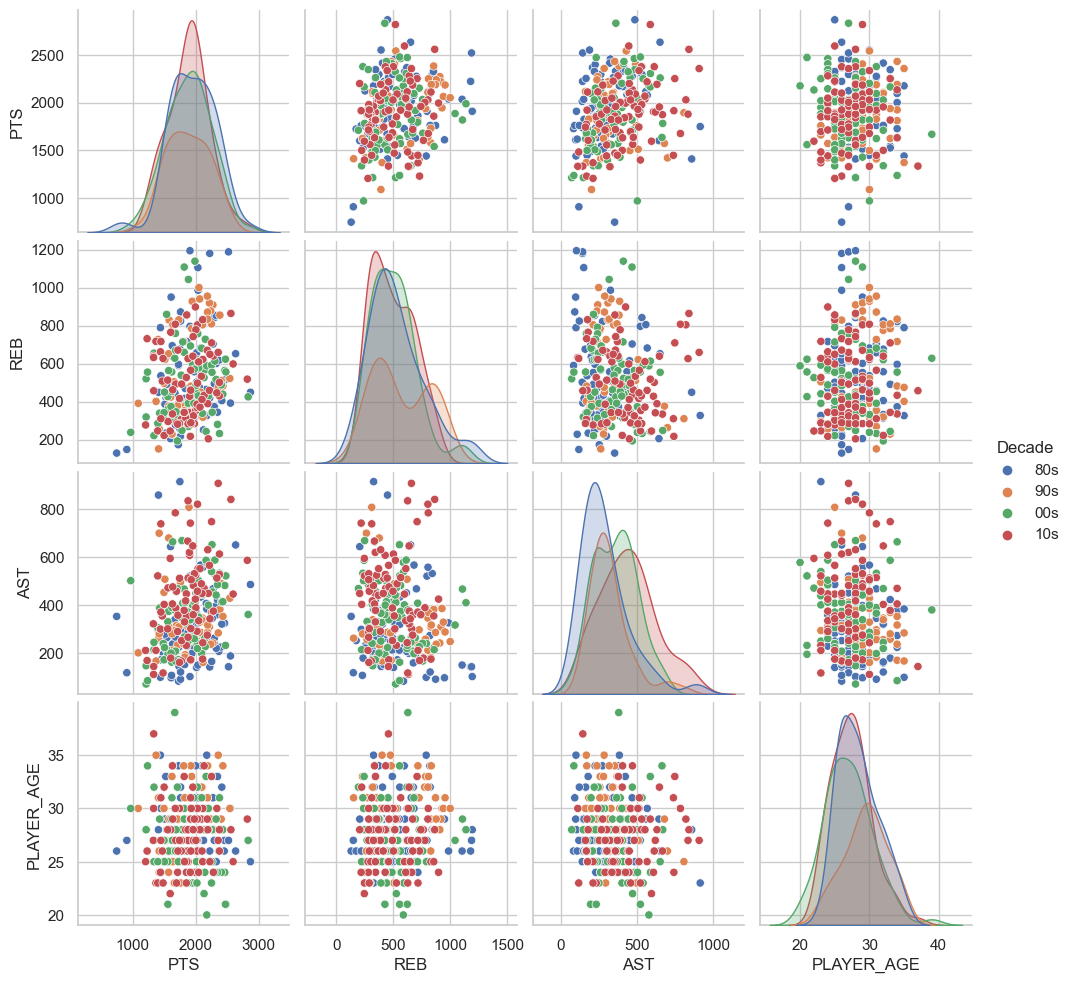

In [376]:
sns.pairplot(mainDFDecade, hue="Decade")


In [377]:
mainDF1.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Age_Group',
       'Decade', 'YearGroupsFives'],
      dtype='object')

<Axes: xlabel='YearGroupsFives', ylabel='PTS'>

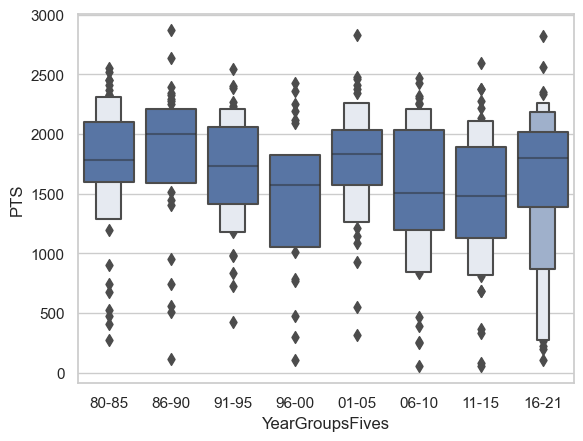

In [378]:

sns.set_theme(style="whitegrid")

#diamonds = sns.load_dataset("diamonds")
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(data=mainDF1, x="YearGroupsFives", y="PTS",
    color="b",
)

<Axes: xlabel='YearGroupsFives', ylabel='PTS'>

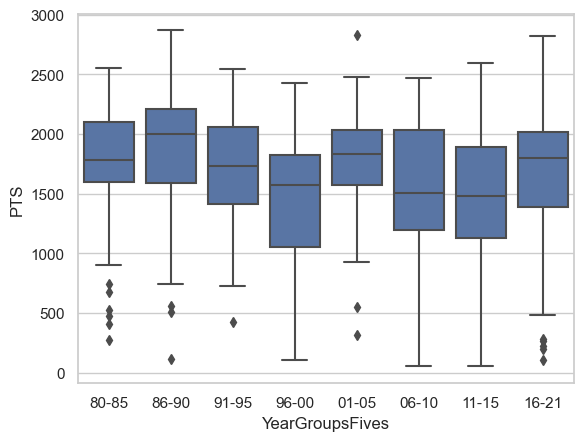

In [379]:

sns.set_theme(style="whitegrid")

#diamonds = sns.load_dataset("diamonds")
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxplot(data=mainDF1, x="YearGroupsFives", y="PTS",
    color="b",
)

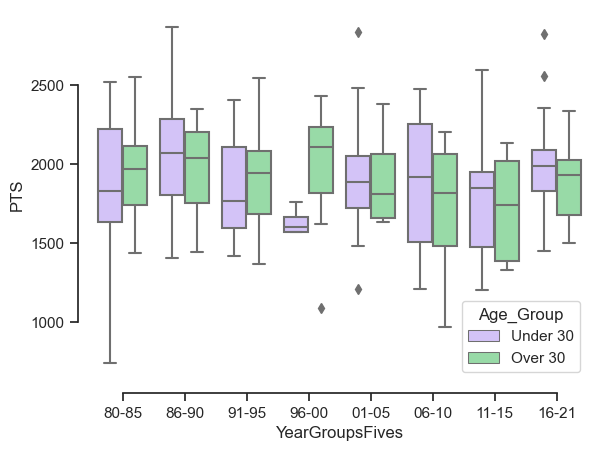

In [380]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="YearGroupsFives", y="PTS",
            hue="Age_Group", palette=["m", "g"],
            data=mainDF3)
sns.despine(offset=10, trim=True)

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

#sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [382]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990


In [383]:
mainDF3=mainDF1.loc[mainDF1['GP'] >=60]

In [384]:
mainDF3


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade,YearGroupsFives
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,419,260,94.0,56.0,251.0,212,2221,Under 30,80s,80-85
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s,80-85
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,657,364,173.0,147.0,266.0,233,2014,Over 30,80s,80-85
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,821,272,59.0,228.0,249.0,244,2095,Over 30,80s,80-85
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,676,158,83.0,53.0,130.0,249,1749,Over 30,80s,80-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,DeMar DeRozan,201942,2022,00,1610612741,CHI,33.0,74,74.0,2682.0,...,343,377,83.0,36.0,153.0,186,1816,Over 30,10s,16-21
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,670,274,66.0,112.0,226.0,205,2183,Under 30,10s,16-21
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,649,342,78.0,51.0,213.0,160,2225,Under 30,10s,16-21
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,742,359,52.0,51.0,246.0,197,1959,Under 30,10s,16-21


In [385]:
#with open('mainDFover60games.pkl','wb') as f: #opens file
#\]
# trpickle.dump(mainDF3,f)

In [386]:
mainDF1.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Age_Group',
       'Decade', 'YearGroupsFives'],
      dtype='object')

In [387]:
mainDFTMP1 = mainDF1[['PTS','FTA','FTM','YearGroupsFives']]
mainDFTMP2 = mainDF1[['FGM','FGA','FG3M','FG3A','MIN','SEASON_ID']]



In [388]:
mainDFTMP1=mainDFTMP1.set_index(['YearGroupsFives'])
mainDFTMP2=mainDFTMP2.set_index(['SEASON_ID'])

<Axes: xlabel='YearGroupsFives'>

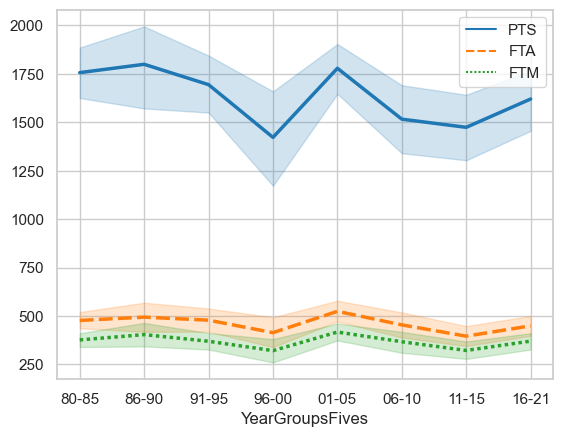

In [389]:
sns.lineplot(data=mainDFTMP1, palette="tab10", linewidth=2.5)


<Axes: xlabel='SEASON_ID'>

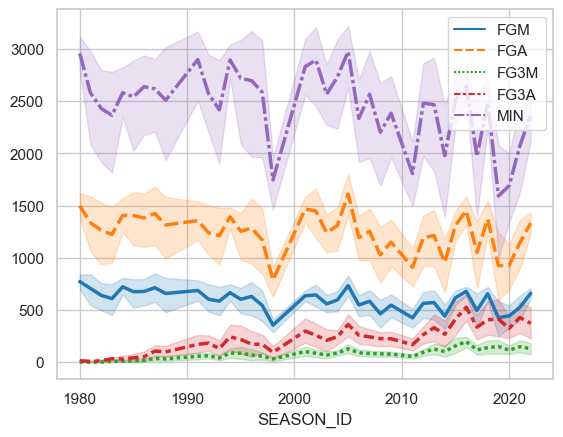

In [390]:
sns.lineplot(data=mainDFTMP2, palette="tab10", linewidth=2.5)


In [391]:
mainDF2

,Player_Name,PLAYER_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade,YearGroupsFives
SEASON_ID,,,,,,,,,,,,,,,,,,,,,
1980,George Gervin,76804,00,1610612759,SAN,29.0,82,NaN,2765.0,850,...,419,260,94.0,56.0,251.0,212,2221,Under 30,80s,80-85
1980,Moses Malone,77449,00,1610612745,HOU,26.0,80,80.0,3245.0,806,...,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s,80-85
1980,Julius Erving,76681,00,1610612755,PHL,31.0,82,NaN,2874.0,794,...,657,364,173.0,147.0,266.0,233,2014,Over 30,80s,80-85
1980,Kareem Abdul-Jabbar,76003,00,1610612747,LAL,34.0,80,80.0,2976.0,836,...,821,272,59.0,228.0,249.0,244,2095,Over 30,80s,80-85
1980,Dan Issel,77097,00,1610612743,DEN,32.0,80,NaN,2641.0,614,...,676,158,83.0,53.0,130.0,249,1749,Over 30,80s,80-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,DeMar DeRozan,201942,00,1610612741,CHI,33.0,74,74.0,2682.0,657,...,343,377,83.0,36.0,153.0,186,1816,Over 30,10s,16-21
2022,Joel Embiid,203954,00,1610612755,PHI,29.0,66,66.0,2284.0,728,...,670,274,66.0,112.0,226.0,205,2183,Under 30,10s,16-21
2022,Jayson Tatum,1628369,00,1610612738,BOS,25.0,74,74.0,2732.0,727,...,649,342,78.0,51.0,213.0,160,2225,Under 30,10s,16-21


In [393]:
mainDF3

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,REB,AST,STL,BLK,TOV,PF,PTS,Age_Group,Decade,YearGroupsFives
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,419,260,94.0,56.0,251.0,212,2221,Under 30,80s,80-85
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,1180,141,83.0,150.0,308.0,223,2222,Under 30,80s,80-85
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,657,364,173.0,147.0,266.0,233,2014,Over 30,80s,80-85
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,821,272,59.0,228.0,249.0,244,2095,Over 30,80s,80-85
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,676,158,83.0,53.0,130.0,249,1749,Over 30,80s,80-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,DeMar DeRozan,201942,2022,00,1610612741,CHI,33.0,74,74.0,2682.0,...,343,377,83.0,36.0,153.0,186,1816,Over 30,10s,16-21
6,Joel Embiid,203954,2022,00,1610612755,PHI,29.0,66,66.0,2284.0,...,670,274,66.0,112.0,226.0,205,2183,Under 30,10s,16-21
5,Jayson Tatum,1628369,2022,00,1610612738,BOS,25.0,74,74.0,2732.0,...,649,342,78.0,51.0,213.0,160,2225,Under 30,10s,16-21
9,Giannis Antetokounmpo,203507,2022,00,1610612749,MIL,28.0,63,63.0,2024.0,...,742,359,52.0,51.0,246.0,197,1959,Under 30,10s,16-21


In [394]:
mainDFTMP2

,SEASON_ID,PLAYER_AGE,SEASON_ID
4,1980,29.0,1980
6,1980,26.0,1980
4,1980,31.0,1980
11,1980,34.0,1980
4,1980,32.0,1980
...,...,...,...
13,2022,33.0,2022
6,2022,29.0,2022
5,2022,25.0,2022
9,2022,28.0,2022


In [415]:
mainDFTMP1 = mainDF3[['PTS','FTA','FTM','YearGroupsFives']]
mainDFTMP2 = mainDF3[['PLAYER_AGE','Age_Group']]
mainDFTMP1=mainDFTMP1.set_index(['YearGroupsFives'])
#mainDFTMP2=mainDFTMP2.set_index(['SEASON_ID'])



<Axes: xlabel='YearGroupsFives'>

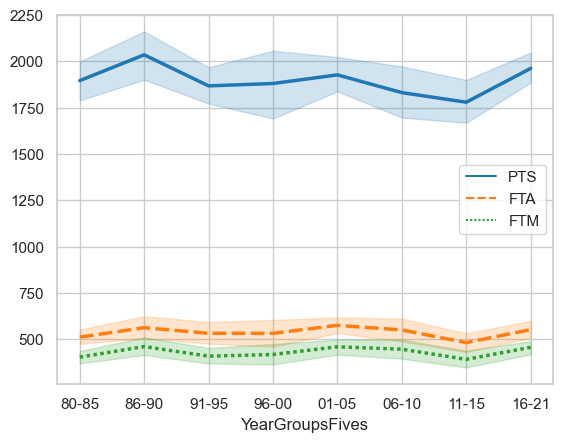

In [416]:
sns.lineplot(data=mainDFTMP1, palette="tab10", linewidth=2.5)


In [417]:
sns.histplot(data=mainDFTMP2, palette="tab10", linewidth=2.5,hue='Age_Group')


ValueError: The following variable cannot be assigned with wide-form data: `hue`